In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
df = pd.read_csv("dataFrameFinal.csv")

In [18]:
all_target = ["rarity_COMMON", "rarity_EPIC","rarity_FREE","rarity_LEGENDARY", "rarity_RARE"]
t0=df.rarity_FREE.values
t1=df.rarity_COMMON.values
t2=df.rarity_RARE.values
t3=df.rarity_EPIC.values
t4=df.rarity_LEGENDARY.values
all_t=[t0,t1,t2,t3,t4]
variable = [col for col in df.columns  if col not in  all_target]
X=df[variable]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=t4)

In [14]:
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0

for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))
        
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
        
    
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )

Meilleur k avec la meilleure precision: k=14, accuracy=0.7659574468085106


In [ ]:
# Meilleur k avec la meilleure accuracy: k=6, accuracy=0.8973774230330672, p=1
Meilleur k avec la meilleure accuracy: k=10, accuracy=0.8990877993158495, p=1

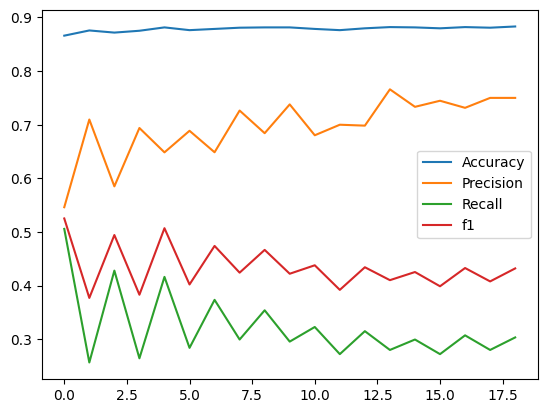

In [16]:
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()

In [ ]:
#Cross validation

In [29]:
mean_acc = 0
mean_prec = 0
mean_rec = 0
mean_f1 = 0
i=0

for test in range (1,31,1) : 
    kfold=KFold(n_splits=5,shuffle=True)
    cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=t4, scoring="accuracy", cv=kfold) 
    mean_acc = mean_acc + cross_val_accuracy.mean()
    cross_val_precision = cross_val_score(estimator=knn, X=X, y=t4, scoring="precision", cv=kfold)
    mean_prec = mean_prec + cross_val_precision.mean()
    cross_val_accuracy_std = cross_val_score(estimator=knn, X=X, y=t4, scoring="recall", cv=kfold)
    mean_rec = mean_rec + cross_val_accuracy_std.mean()
    cross_val_f1 = cross_val_score(estimator=knn, X=X, y=t4, scoring="f1", cv=kfold)
    mean_f1 = mean_f1 + cross_val_f1.mean()
    i=i+1
print(f" ========= Average k-fold validation score total : {mean_acc / i}")
print(f" ========= Average k-fold validation score total : {mean_prec / i}")
print(f" ========= Average k-fold validation score total : {mean_rec / i}")
print(f" ========= Average k-fold validation score total : {mean_f1 / i}")


 ========= Average k-fold validation score total : 0.8813116623895066
 ========= Average k-fold validation score total : 0.7187980857972264
 ========= Average k-fold validation score total : 0.31344264348134343
 ========= Average k-fold validation score total : 0.4325185407347314


In [ ]:
#Meilleur split avec la meilleure accuracy, precision, error: accuracy=0.8874237480493686 / 22, precision=0.7029224164613145 / 21, recall=0.3656646557104223 / 2

Meilleur k avec la meilleure precision: k=4, accuracy=0.9403973509933775


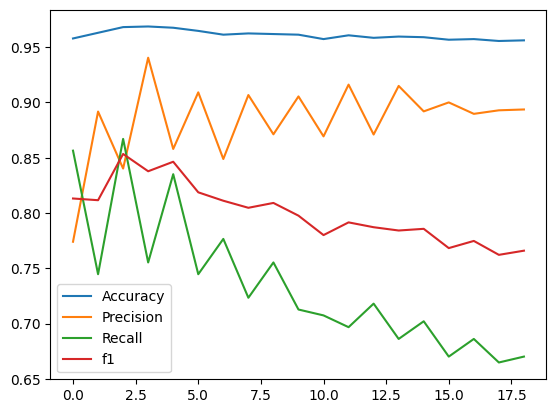

In [20]:
#rarity_FREE
X_train, X_test, y_train, y_test = train_test_split(X,t0, test_size=0.3, stratify=t0)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()

Meilleur k avec la meilleure precision: k=6, accuracy=0.6498316498316499


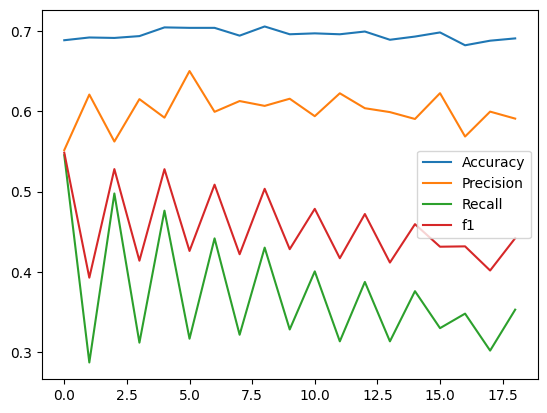

In [21]:
#rarity_COMMON
X_train, X_test, y_train, y_test = train_test_split(X,t1, test_size=0.3, stratify=t1)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()

Meilleur k avec la meilleure precision: k=16, precision=0.5348837209302325


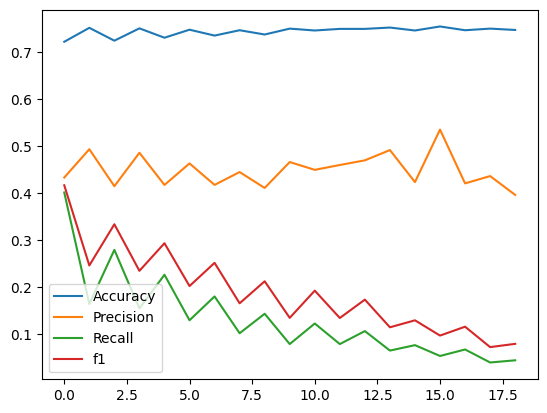

In [22]:
#rarity_RARE
X_train, X_test, y_train, y_test = train_test_split(X,t2, test_size=0.3, stratify=t2)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()

lancer
Meilleur k avec la meilleure precision: k=16, precision=0.5384615384615384


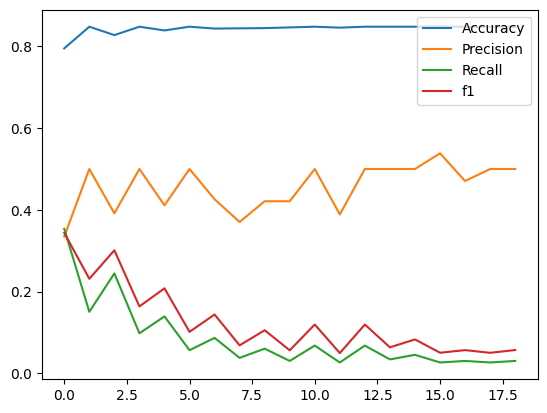

In [24]:
#rarity_EPIC
X_train, X_test, y_train, y_test = train_test_split(X,t3, test_size=0.3, stratify=t3)
split_accuracy = []
split_precision = []
split_recall = []
split_f1 = []
best_accuracy = 0
best_k = 0
print("lancer")
for i in range(1, 20, 1):
    #print(f"k={i}")
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    precision = precision_score(y_test, prediction)
    #print(f"Accuracy: {accuracy_score(y_test, prediction)}")
    split_accuracy.append(accuracy_score(y_test, prediction))
    split_precision.append(precision_score(y_test, prediction))
    split_recall.append(recall_score(y_test, prediction))
    split_f1.append(f1_score(y_test, prediction))
            
    if precision > best_accuracy:
        best_accuracy = precision
        best_k = i
print(f"Meilleur k avec la meilleure precision: k={best_k}, precision={best_accuracy}" )
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.plot(split_recall, label="Recall")
plt.plot(split_f1, label="f1")
plt.legend()